## Sequential Forward Floating Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Floating Selection

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features=22,
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   14.0s finished

[2022-11-03 01:31:25] Features: 1/22 -- score: 0.8441222038142502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   15.1s finished

[2022-11-03 01:31:40] Features: 2/22 -- score: 0.8463838348639243[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   20.5s finished

[2022-11-03 01:41:13] Features: 18/22 -- score: 0.8588734594874173[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   17.6s finished

[2022-11-03 01:41:35] Features: 19/22 -- score: 0.8475051573998739[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

{1: {'feature_idx': (10,),
  'cv_scores': array([0.87610619, 0.80542986, 0.84210526, 0.84848485, 0.84848485]),
  'avg_score': 0.8441222038142502,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (10, 19),
  'cv_scores': array([0.83700441, 0.84581498, 0.82666667, 0.85106383, 0.87136929]),
  'avg_score': 0.8463838348639243,
  'feature_names': ('total_score', 'resource')},
 3: {'feature_idx': (10, 16, 19),
  'cv_scores': array([0.88311688, 0.82352941, 0.86842105, 0.87068966, 0.85957447]),
  'avg_score': 0.8610662941541378,
  'feature_names': ('total_score', 'ouelluminate', 'resource')},
 4: {'feature_idx': (10, 16, 19, 21),
  'cv_scores': array([0.84716157, 0.84955752, 0.84978541, 0.88695652, 0.88412017]),
  'avg_score': 0.8635162390629135,
  'feature_names': ('total_score', 'ouelluminate', 'resource', 'url')},
 5: {'feature_idx': (8, 10, 16, 19, 21),
  'cv_scores': array([0.86324786, 0.85840708, 0.86086957, 0.88135593, 0.88888889]),
  'avg_score': 0.8705538658407102,
  'feature_

In [16]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [17]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [18]:
forward_feature_selection.k_score_

0.8450756698381705

In [19]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forwardfloating.randomforest.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8761061946902654, 0.8054298642533937, 0.842...",0.844122,"(total_score,)",0.029095,0.022637,0.011319
2,"(10, 19)","[0.8370044052863438, 0.8458149779735683, 0.826...",0.846384,"(total_score, resource)",0.019264,0.014988,0.007494
3,"(10, 16, 19)","[0.8831168831168831, 0.823529411764706, 0.8684...",0.861066,"(total_score, ouelluminate, resource)",0.025988,0.02022,0.01011
4,"(10, 16, 19, 21)","[0.8471615720524018, 0.8495575221238938, 0.849...",0.863516,"(total_score, ouelluminate, resource, url)",0.02317,0.018027,0.009013
5,"(8, 10, 16, 19, 21)","[0.8632478632478634, 0.8584070796460177, 0.860...",0.870554,"(disability, total_score, ouelluminate, resour...",0.015716,0.012228,0.006114
6,"(8, 10, 16, 19, 20, 21)","[0.864406779661017, 0.8711111111111112, 0.8632...",0.876548,"(disability, total_score, ouelluminate, resour...",0.02047,0.015926,0.007963
7,"(8, 10, 16, 18, 19, 20, 21)","[0.8851063829787235, 0.857142857142857, 0.8510...",0.870013,"(disability, total_score, ouelluminate, page, ...",0.025838,0.020103,0.010051
8,"(5, 8, 10, 16, 18, 19, 20, 21)","[0.8620689655172413, 0.8597285067873304, 0.864...",0.867951,"(age_band, disability, total_score, ouellumina...",0.019305,0.01502,0.00751
9,"(5, 8, 10, 16, 17, 18, 19, 20, 21)","[0.8706896551724138, 0.8634361233480177, 0.841...",0.864815,"(age_band, disability, total_score, ouellumina...",0.017872,0.013905,0.006952
10,"(5, 8, 10, 11, 16, 17, 18, 19, 20, 21)","[0.8888888888888888, 0.8660714285714286, 0.843...",0.861778,"(age_band, disability, total_score, externalqu...",0.020011,0.015569,0.007785


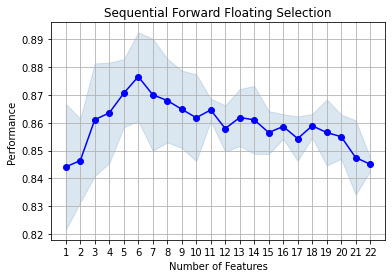

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= (1,22),
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   15.5s finished

[2022-11-03 01:44:49] Features: 1/22 -- score: 0.8456042734185905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   15.9s finished

[2022-11-03 01:45:05] Features: 2/22 -- score: 0.8454311556042955[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   15.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.5s finished

[2022-11-03 01:49:48] Features: 13/22 -- score: 0.8578726655007667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   11.1s finished

[2022-11-03 01:50:07] Features: 14/22 -- score: 0.8536755779277174[Parallel(n_jobs=1)]: U

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   17.6s finished

[2022-11-03 01:55:41] Features: 20/22 -- score: 0.8591666134735053[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.4s finished

[2022-11-03 01:56:01] Features: 21/22 -- score: 0.8476683945128707[Parallel(n_jobs=1)]: U

In [22]:
forward_feature_selection.k_feature_names_

('age_band',
 'num_of_prev_attempts',
 'disability',
 'total_score',
 'resource',
 'subpage')

In [23]:
forward_feature_selection.k_score_

0.8732597248456898

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8761061946902654, 0.8054298642533937, 0.842...",0.845604,"(total_score,)",0.029705,0.023112,0.011556
2,"(10, 19)","[0.8444444444444444, 0.8355555555555556, 0.834...",0.845431,"(total_score, resource)",0.012524,0.009744,0.004872
3,"(5, 10, 19)","[0.8512396694214875, 0.8482142857142857, 0.858...",0.860014,"(age_band, total_score, resource)",0.016825,0.01309,0.006545
4,"(5, 8, 10, 19)","[0.864406779661017, 0.8622222222222222, 0.8596...",0.861052,"(age_band, disability, total_score, resource)",0.008288,0.006448,0.003224
5,"(5, 8, 10, 19, 20)","[0.8646288209606987, 0.8658008658008658, 0.851...",0.866061,"(age_band, disability, total_score, resource, ...",0.01783,0.013872,0.006936
6,"(5, 6, 8, 10, 19, 20)","[0.8793103448275862, 0.868421052631579, 0.8510...",0.87326,"(age_band, num_of_prev_attempts, disability, t...",0.019882,0.015469,0.007734
7,"(5, 6, 8, 10, 16, 19, 20)","[0.8744588744588744, 0.8584070796460177, 0.860...",0.868606,"(age_band, num_of_prev_attempts, disability, t...",0.01555,0.012099,0.006049
8,"(5, 6, 10, 13, 16, 17, 19, 20)","[0.8888888888888888, 0.8558951965065502, 0.842...",0.869377,"(age_band, num_of_prev_attempts, total_score, ...",0.022347,0.017387,0.008693
9,"(5, 6, 8, 10, 13, 16, 17, 19, 20)","[0.8803418803418803, 0.8722466960352422, 0.851...",0.869375,"(age_band, num_of_prev_attempts, disability, t...",0.015258,0.011871,0.005935
10,"(5, 6, 10, 12, 13, 16, 17, 18, 19, 20)","[0.8841201716738198, 0.8687782805429864, 0.851...",0.862856,"(age_band, num_of_prev_attempts, total_score, ...",0.022813,0.017749,0.008875


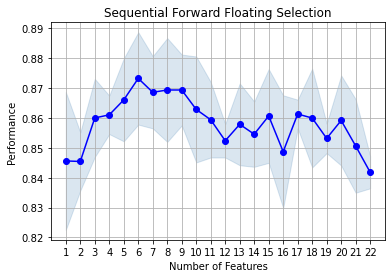

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()